#### The final version of our classification

In [1]:
# LIBRARIES
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

import numpy as np
import pandas as pd
import classification as clas
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# READING DATA

data = pd.read_csv('train.csv')
train_df, test_df = clas.getTwoDatasets(data)

In [3]:
# ACCURACY BEFORE PREPROCESSING ALGORITHMS
pd.options.mode.copy_on_write = True

X_train = train_df[['Pclass','Age','Fare','Sex']]
X_train['Sex'] = X_train.Sex.copy().apply(lambda x : 1.0 if x == 'male' else 2.0).copy()
X_train = X_train.fillna(0)
y_train = train_df['Survived']

X_test = test_df[['Pclass','Age','Fare','Sex']]
X_test.Sex = X_test.Sex.apply(lambda x : 1.0 if x == 'male' else 2.0)
X_test = X_test.fillna(0)
y_test = test_df['Survived']

acc = clas.getAccuracy(X_train, y_train,X_test, y_test)
print("Accuracy before preprocessing: ", acc)

Accuracy before preprocessing:  0.6974789915966386


In [4]:
# NORMALIZATION
clas.changeNullValuesToNewValue(train_df)
clas.changeNameToSurname(train_df, 'Name')
clas.changeCaterogicalToDescrite(train_df)
clas.changeContinuousToDescrite(train_df)
clas.printVariableType(train_df)
normalized_data = clas.normalizeData(train_df, 'Survived')

clas.changeNullValuesToNewValue(test_df)
clas.changeNameToSurname(test_df, 'Name')
clas.changeCaterogicalToDescrite(test_df)
clas.changeContinuousToDescrite(test_df)
normalized_data_test = clas.normalizeData(test_df, 'Survived')

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'] 12
[1.0, 0.004, 0.006, 0.816, 0.004, 0.009, 0.013, 0.011, 0.835, 0.009, 0.174, 0.007]
['int64 (Integer numbers)', 'int64 (Integer numbers)', 'int64 (Integer numbers)', 'int32 (Integer numbers)', 'int32 (Integer numbers)', 'float64 (Floating point numbers)', 'int64 (Integer numbers)', 'int64 (Integer numbers)', 'int32 (Integer numbers)', 'float64 (Floating point numbers)', 'int32 (Integer numbers)', 'int32 (Integer numbers)']


In [5]:
# FEATURE EXTRACTION
y = train_df['Survived']
y_test = test_df['Survived']
X_pca, X_pca_test, pca_df, pca_df_test = clas.computePCA(normalized_data, normalized_data_test)

PCA components:  [[ 3.29772078e-02 -5.63704386e-01 -5.72376971e-02 -7.26936005e-01
   8.51706011e-04 -5.50523854e-04  4.20701116e-02 -1.78568071e-01
   1.66000220e-01 -2.63041345e-01 -1.37961804e-01]
 [ 7.55112604e-02 -6.04706238e-01 -9.01817300e-03  6.66512028e-01
   1.73117512e-01 -5.15892869e-02 -5.51705668e-02 -2.13307406e-01
   1.18255792e-01 -2.92867979e-01 -5.81184140e-02]
 [-1.30074677e-01 -8.60165078e-02 -4.43299826e-01  1.13471415e-01
  -8.20312194e-01  6.99899002e-02  1.23166765e-01 -1.12200932e-01
   4.59096302e-02 -5.11707180e-02  2.36633307e-01]
 [-8.76425255e-01 -1.00773389e-01  5.25813201e-02  4.75540455e-02
   1.83209339e-02  4.72267647e-02  1.09843798e-02  3.59482592e-01
   8.95421948e-02 -8.41350824e-02 -2.63981784e-01]]


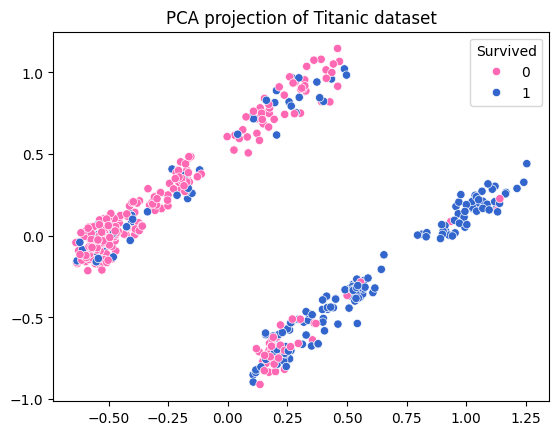

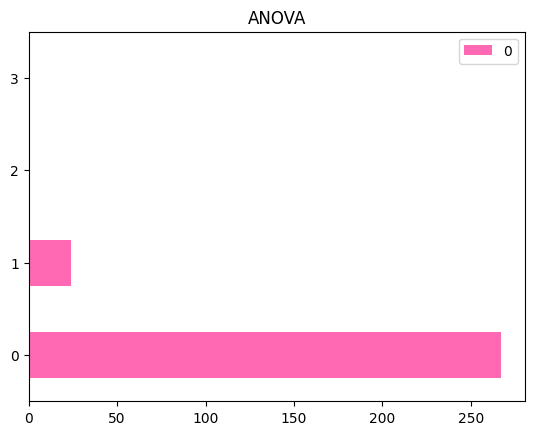

In [6]:
# FEATURE SELECTION
sns.scatterplot(data=train_df, x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette = ['hotpink', '#3366CC']).set_title('PCA projection of Titanic dataset')
anova_df = clas.computeAnova(pca_df, train_df['Survived'])
anova_df.plot(kind='barh', title='ANOVA', color=['hotpink'])
clas.dropColumns(pca_df, [0])
clas.dropColumns(pca_df_test, [0])

In [7]:
# CALCULATING ACCURACY
X_numpy = pca_df.to_numpy()
y_numpy = y.to_numpy()

X_test_numpy = pca_df_test.to_numpy()
y_test_numpy = y_test.to_numpy()

classifier = SVC()
classifier.fit(X_numpy, y_numpy)
predicts = classifier.predict(X_test_numpy)

report = classification_report(y_test_numpy, predicts)
accuracy = accuracy_score(y_test_numpy, predicts)
print("Accuracy : ", accuracy)

Accuracy :  0.8207282913165266


In [8]:
# WRITING OUR DATASETS INTO CSV FILES

pca_df.set_axis(['feature0'], axis=1, copy=False)
pca_df_test.set_axis(['feature0'], axis=1, copy=False)

train_df_with_target = pd.concat([pca_df, pd.DataFrame({'Survived': y_numpy})], axis=1)
test_df_with_target = pd.concat([pca_df_test, pd.DataFrame({'Predicted_Survived': predicts})], axis=1)

train_df_with_target.to_csv('train_dataset.csv', index=False)
test_df_with_target.to_csv('test_dataset.csv', index=False)